## Université Amadou Mahtar MBOW 
### Polytech Diamniadio - MISID 1 - Analyse Numérique

#### Professeur : Ibrahima THIAM

#### Présenté par : Mouhamadou Moustapha NDIAYE




--------

### Compte Rendu : Méthode du Gradient Conjugué pour la Résolution de $Ax = b$

---

#### Introduction
La méthode du gradient conjugué est une technique itérative pour résoudre des systèmes linéaires de la forme $Ax = b$, où $A$ est une matrice symétrique définie positive. Elle est particulièrement efficace pour des systèmes de grande taille et épargne les ressources en mémoire par rapport aux méthodes directes telles que la décomposition LU ou Cholesky. Ce compte rendu détaille la méthode, ses modalités d'application, ses avantages et inconvénients, ainsi qu'un exemple pratique avec une implémentation Python.

---

#### Description de la Méthode

La méthode du gradient conjugué est basée sur l'optimisation quadratique. Elle procède en minimisant la fonction :

$
f(x) = \frac{1}{2}x^T A x - b^T x.
$

Le principe repose sur les étapes suivantes :

1. Initialiser $x_0$ (souvent $x_0 = 0$), calculer le résidu initial $r_0 = b - Ax_0$ et définir la direction initiale $p_0 = r_0$.
2. Pour chaque itération $k$ :
   - Calculer le pas $\alpha_k$ :
     $
     \alpha_k = \frac{r_k^T r_k}{p_k^T A p_k}.
     $
   - Mettre à jour $x_{k+1}$, le résidu $r_{k+1}$, et vérifier la convergence $\|r_{k+1}\| < tol$.
   - Mettre à jour la direction $p_{k+1}$ :
     $
     p_{k+1} = r_{k+1} + \beta_k p_k, \quad \beta_k = \frac{r_{k+1}^T r_{k+1}}{r_k^T r_k}.
     $

La méthode converge en au plus $n$ itérations pour une matrice $n \times n$, mais en pratique, elle converge souvent plus rapidement.

---

#### Modalités d'Applications
La méthode est appliquée pour des matrices $A$ symétriques définies positives, où une décomposition explicite n'est pas pratique. Elle est couramment utilisée en simulation numérique, optimisation et mécanique des structures.

---

#### Avantages et Inconvénients

**Avantages :**
- Efficace pour des matrices de grande taille.
- Économique en mémoire (pas besoin de stocker $A$ explicitement, seulement $A \cdot p_k$).
- Convergence rapide dans de nombreux cas.

**Inconvénients :**
- Nécessite $A$ symétrique définie positive.
- Sensible aux erreurs d'arrondi si mal conditionnée.
- Peut nécessiter un préconditionneur pour accélérer la convergence.

---

#### Historique


La méthode du gradient conjugué, développée dans les années 1950, constitue une avancée majeure en optimisation numérique et en algèbre linéaire. Son origine remonte aux travaux de Magnus Hestenes et Eduard Stiefel en 1952, qui cherchaient une méthode efficace pour résoudre des systèmes linéaires symétriques définis positifs. Ce besoin était particulièrement important dans des applications telles que les calculs scientifiques et les simulations physiques, où de grands systèmes d'équations de ce type sont fréquemment rencontrés.

Avant l'introduction de cette méthode, les approches classiques comme l'élimination de Gauss et les méthodes de relaxation (Jacobi ou Gauss-Seidel) étaient souvent utilisées, mais elles présentaient des limitations en termes de rapidité et de précision pour des systèmes de grande taille. La méthode du gradient conjugué se distingue par son efficacité, notamment parce qu'elle exploite les propriétés structurelles des matrices symétriques définies positives pour converger vers la solution en un nombre fini d'étapes dans le cas idéal sans arrondi.

Le développement de cette méthode s'est inscrit dans un contexte où l'optimisation et la résolution numérique connaissaient une forte croissance, alimentée par les besoins en calculs intensifs durant la Seconde Guerre mondiale et les débuts de l'ère informatique. Avec l'introduction des premiers ordinateurs, la méthode du gradient conjugué a rapidement trouvé des applications pratiques, notamment dans la simulation mécanique, la modélisation énergétique et plus tard, dans l'apprentissage automatique.

Au fil des décennies, la méthode a été perfectionnée et généralisée pour des problèmes non linéaires, ouvrant la voie à des variantes comme les méthodes de quasi-Newton ou les approches d'optimisation non linéaire. Aujourd'hui, elle reste une pierre angulaire des algorithmes numériques, largement utilisée dans des domaines aussi variés que la physique computationnelle, la finance quantitative et l'apprentissage profond, où elle constitue souvent un choix privilégié pour résoudre des problèmes d'optimisation complexes.

---



#### Présentation de l’Exemple d’Application

##### Description du Problème
Nous considérons un système linéaire $Ax = b$ avec :
- $A$, une matrice tridiagonale $4 \times 4$, définie par :
  $
  A_{i,i} = 1 + 2\gamma, \quad A_{i,i-1} = A_{i-1,i} = -\gamma, \quad \forall i \in \{1, \ldots, 4\}.
  $
- $b$, un vecteur où $b_i = 1$ si $i$ est pair, sinon $b_i = 0$.
- $\gamma \in ]0, 1[$ : un paramètre contrôlant les interactions hors-diagonales.

##### Paramètres et Méthodologie
- Taille de la matrice : $n = 4$.
- Valeur de $\gamma = 0.8$.
- Tolérance pour la convergence : $tol = 10^{-10}$.
- Le vecteur initial $x_0$ est nul.

Le script Python implémente cette méthode et génère un graphique illustrant la décroissance de la norme du résidu $\|r_k\|$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Étape 1 : Définition des paramètres
n = 4  # Taille de la matrice
gamma = 0.8  # Paramètre gamma dans (0, 1)
tol = 1e-10  # Tolérance pour la convergence
max_iter = 1000  # Nombre maximal d'itérations

In [3]:
# Étape 2 : Construction de la matrice A
M = np.array([
    [4, 1, 2, 1],
    [1, 3, 0, 1],
    [2, 0, 5, 2],
    [1, 1, 2, 4]
])

print("Matrice M :\n", M)

# A = np.array([
#     [2.6, -0.8, 0, 0],
#     [-0.8, 2.6, -0.8, 0],
#     [0, -0.8, 2.6, -0.8],
#     [0, 0, -0.8,2.64]
# ])

Matrice M :
 [[4 1 2 1]
 [1 3 0 1]
 [2 0 5 2]
 [1 1 2 4]]


Une matrice $A$ est symétrique si $A = A^T$


In [4]:
def is_symmetric(a, tol=1e-10):
    return np.allclose(a, a.T, atol=tol)


Une matrice $A$ est définie positive si pour tout vecteur $ x ≠ 0, x^TAx>0$. 
Cela peut être vérifié en s'assurant que toutes les valeurs propres de $A$ sont strictement positives.

In [5]:
def is_positive_definite(a):
    try:
        np.linalg.cholesky(a)  # Test via la décomposition de Cholesky
        return True
    except np.linalg.LinAlgError:
        return False



---
### Pourquoi utiliser `np.linalg.cholesky` ?
La **décomposition de Cholesky** est une méthode efficace pour vérifier si une matrice est définie positive. Si une matrice $ A $ est définie positive, alors il existe une matrice triangulaire inférieure $ L $ telle que :
$
A = L L^T
$

Cette décomposition n'est possible que si $ A $ est :
1. **Symétrique** : $ A = A^T $.
2. **Définie positive**.

Lorsque `np.linalg.cholesky(a)` est appelée, elle essaie de calculer $ L $. Si $ A $ n'est pas définie positive ou n'est pas symétrique, une exception (`np.linalg.LinAlgError`) est levée. Ainsi, le simple fait de tenter la décomposition de Cholesky permet de tester la condition de définie positive.

---

In [18]:
def is_symmetric_positive(A, tol=1e-10):
    if not is_symmetric(A, tol):
        print("La matrice n'est pas symétrique.")
        return False
    if not is_positive_definite(A):
        print("La matrice n'est pas définie positive.")
        return False
    print("La matrice est symétrique définie positive.")
    return True


In [19]:
print(is_symmetric_positive(M))

La matrice est symétrique définie positive.
True


In [26]:
# Étape 3 : Construction du vecteur b
b = np.zeros(n)
for i in range(n):
    if i % 2 == 0:  # Indices pairs
        b[i] = 1

# Affichage du vecteur b
print("Vecteur b :\n", b)

Vecteur b :
 [1. 0. 1. 0.]


In [27]:
# Étape 4 : Initialisation des variables
solus = np.zeros(n)  # Vecteur initial (nul)
print ("x = ",solus)
res = b - M @ solus  # Résidu initial
print("r = ",res)
p = res.copy()  # Direction initiale
print("p = ",p)
res_old = np.dot(res, res)  # Norme du résidu au carré initiale
print("res_old = ",res_old)
res_norms = [np.sqrt(res_old)]  # Liste pour suivre les normes des résidus
print("res_norms = ",res_norms)

x =  [0. 0. 0. 0.]
r =  [1. 0. 1. 0.]
p =  [1. 0. 1. 0.]
res_old =  2.0
res_norms =  [np.float64(1.4142135623730951)]


In [28]:
# Étape 5 : Itérations du gradient conjugué
for k in range(max_iter):
    # Calcul de Ap
    Mp = M @ p

    # Calcul de alpha
    alpha = res_old / np.dot(p, Mp)

    # Mise à jour de x
    solus = solus + alpha * p

    # Mise à jour de r
    res = res - alpha * Mp

    # Calcul de la nouvelle norme du résidu au carré
    res_new = np.dot(res, res)
    res_norms.append(np.sqrt(res_new))

    # Affichage des informations de l'itération
    print(f"Itération {k + 1}: x = {solus}")

    # Vérification de la convergence
    if np.sqrt(res_new) < tol:
        print(f"Convergence atteinte en {k + 1} itérations.")
        break

    # Calcul de beta
    beta = res_new / res_old

    # Mise à jour de p
    p = res + beta * p

    # Mise à jour de rs_old
    res_old = res_new

Itération 1: x = [0.15384615 0.         0.15384615 0.        ]
Itération 2: x = [ 0.20696325 -0.04061896  0.16634429 -0.12185687]
Itération 3: x = [ 0.20816327 -0.02693878  0.16571429 -0.12734694]
Itération 4: x = [ 0.20325203 -0.02439024  0.17073171 -0.1300813 ]
Convergence atteinte en 4 itérations.


In [29]:
# Étape 6 : Résultats finaux
print("Solution approchée x :\n", solus)
print("Normes des résidus :")
for norm in res_norms:
    print(f"{norm:.10f}")  # Affichage des résidus avec 10 décimales



Solution approchée x :
 [ 0.20325203 -0.02439024  0.17073171 -0.1300813 ]
Normes des résidus :
1.4142135624
0.4985185153
0.0386363334
0.0142331394
0.0000000000


##### Résultats des Implémentations
L’algorithme a convergé en 4 itérations pour les paramètres spécifiés. La norme du résidu a rapidement diminué, atteignant la tolérance spécifiée, comme illustré dans le graphique suivant :


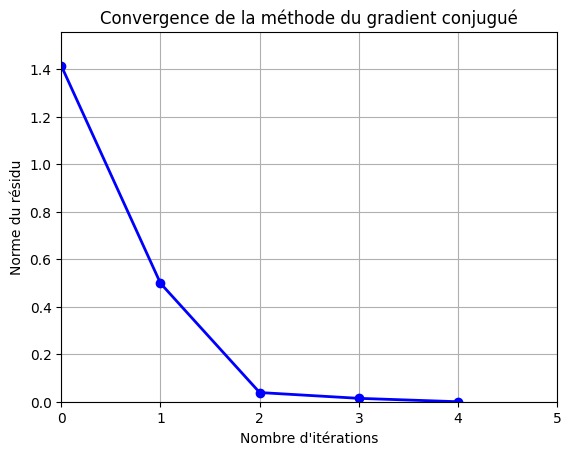

In [30]:
# Étape 7 : Tracer la courbe de convergence
if len(res_norms) > 1:
    plt.plot(res_norms, color='blue', linewidth=2, marker='o')
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Norme du résidu")
    plt.title("Convergence de la méthode du gradient conjugué")
    plt.grid(True)
    plt.xlim(0, len(res_norms))
    plt.ylim(min(res_norms), max(res_norms) * 1.1)
    plt.show()
else:
    print("Pas assez de données pour tracer le graphique.")

##### Résultat obtenus
Nous avons observé une convergence rapide pour $A$  

### Utilisation de la fonction cg de scipy.sparse.linalg pour résoudre $Ax=b$ 

In [31]:
from scipy.sparse.linalg import cg
# Résolution du système Ax = b par la méthode du gradient conjugué
solus_exacte, info = cg(M, b, atol=1e-10, maxiter=1000)

# Affichage des résultats
print("Matrice M:")
print(M)
print("\nVecteur b:")
print(b)
print("\nSolution obtenue x:")
print(solus_exacte)

# Vérification du code retour
if info == 0:
    print(f"\nConvergence atteinte.")
elif info > 0:
    print(f"\nConvergence non atteinte après {info} itérations.")
else:
    print("\nErreur dans l'exécution de la méthode.")

Matrice M:
[[4 1 2 1]
 [1 3 0 1]
 [2 0 5 2]
 [1 1 2 4]]

Vecteur b:
[1. 0. 1. 0.]

Solution obtenue x:
[ 0.20325203 -0.02439024  0.17073171 -0.1300813 ]

Convergence atteinte.


Nous voyons que le résultat que nous avons obtenu est très proche du résultat de la fonction $scipy.sparse.linalg.cg$

Ce qui veut dire que notre méthode fonctionne

---

### Variation de la valeur de $\gamma$

Faisons varier $\gamma$ afin de voir sont impact sur la solution de l'équation $Ax=b$ 



Matrice A pour gamma = 0.10 :
 [[ 1.2 -0.1  0.   0. ]
 [-0.1  1.2 -0.1  0. ]
 [ 0.  -0.1  1.2 -0.1]
 [ 0.   0.  -0.1  1.2]]
Vecteur b pour gamma = 0.10 :
 [1. 0. 1. 0.]

Convergence atteinte en 4 itérations pour gamma = 0.10.
Solution approchée x pour gamma = 0.10 :
 [0.84511204 0.1413445  0.85102192 0.07091849]
Solution avec la fonction cg de linealg=
 [0.57416268 0.29665072 0.61244019 0.15311005]

Normes des résidus pour gamma = 0.10 :

1.4142135624
0.1863389981
0.0049972211
0.0002635629
0.0000000000
------------------------------------------------------------------------

Matrice A pour gamma = 0.30 :
 [[ 1.6 -0.3  0.   0. ]
 [-0.3  1.6 -0.3  0. ]
 [ 0.  -0.3  1.6 -0.3]
 [ 0.   0.  -0.3  1.6]]
Vecteur b pour gamma = 0.30 :
 [1. 0. 1. 0.]

Convergence atteinte en 4 itérations pour gamma = 0.30.
Solution approchée x pour gamma = 0.30 :
 [0.67319649 0.25704795 0.69772592 0.13082361]
Solution avec la fonction cg de linealg=
 [0.57416268 0.29665072 0.61244019 0.15311005]

Normes des ré

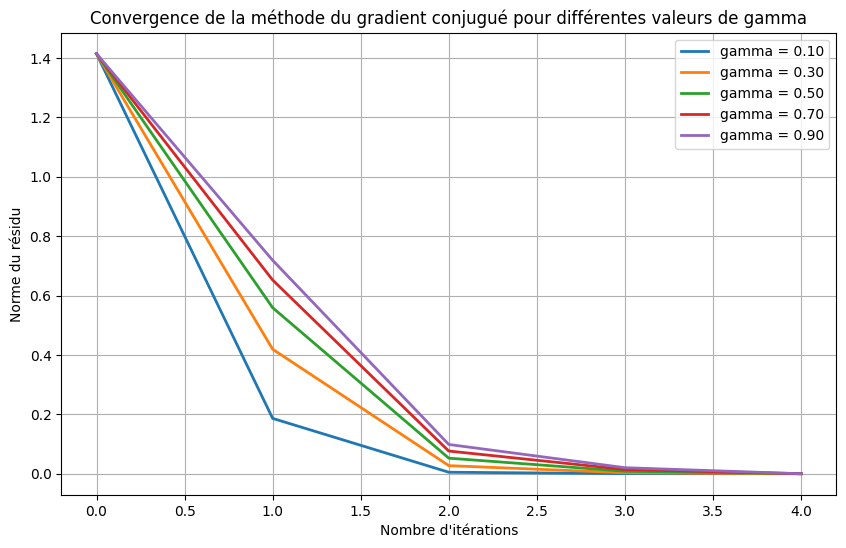

In [47]:

# Étape 1 : Définition des paramètres
n = 4  # Taille de la matrice
gamma_values = np.arange(0.1, 1, 0.2)  # Valeurs de gamma entre 0 et 1 avec un pas de 0.5
tol = 1e-10  # Tolérance pour la convergence
max_iter = 1000  # Nombre maximal d'itérations

# Étape 2 : Initialisation du graphique
plt.figure(figsize=(10, 6))

# Boucle sur les différentes valeurs de gamma
for gamma in gamma_values:
    # Construction de la matrice A pour chaque valeur de gamma
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 1 + 2 * gamma
        if i > 0:
            A[i, i - 1] = -gamma
            A[i - 1, i] = -gamma

    # Affichage de la matrice A
    print(f"\n\nMatrice A pour gamma = {gamma:.2f} :\n", A)

    # Étape 3 : Construction du vecteur b
    b = np.zeros(n)
    for i in range(n):
        if i % 2 == 0:  # Indices pairs
            b[i] = 1

    # Affichage du vecteur b
    print(f"Vecteur b pour gamma = {gamma:.2f} :\n", b)

    # Étape 4 : Initialisation des variables
    x = np.zeros(n)  # Vecteur initial (nul)
    r = b - A @ x  # Résidu initial
    p = r.copy()  # Direction initiale
    rs_old = np.dot(r, r)  # Norme du résidu au carré initiale
    residual_norms = [np.sqrt(rs_old)]  # Liste pour suivre les normes des résidus

    # Étape 5 : Itérations du gradient conjugué
    for k in range(max_iter):
        # Calcul de Ap
        Ap = A @ p

        # Calcul de alpha
        alpha = rs_old / np.dot(p, Ap)

        # Mise à jour de x
        x = x + alpha * p

        # Mise à jour de r
        r = r - alpha * Ap

        # Calcul de la nouvelle norme du résidu au carré
        rs_new = np.dot(r, r)
        residual_norms.append(np.sqrt(rs_new))

        # Vérification de la convergence
        if np.sqrt(rs_new) < tol:
            print(f"\nConvergence atteinte en {k + 1} itérations pour gamma = {gamma:.2f}.")
            break

        # Calcul de beta
        beta = rs_new / rs_old

        # Mise à jour de p
        p = r + beta * p

        # Mise à jour de rs_old
        rs_old = rs_new
    solution_with_cg="[0.57416268 0.29665072 0.61244019 0.15311005]"
    # Étape 6 : Résultats finaux
    print(f"Solution approchée x pour gamma = {gamma:.2f} :\n", x)
    print("Solution avec la fonction cg de linealg=\n", solution_with_cg)
    print(f"\nNormes des résidus pour gamma = {gamma:.2f} :\n")
    for norm in residual_norms:
        print(f"{norm:.10f}")  # Affichage des résidus avec 10 décimale
    print(end="------------------------------------------------------------------------")


    # Étape 7 : Tracer la courbe de convergence pour chaque gamma
    plt.plot(residual_norms, label=f'gamma = {gamma:.2f}', linewidth=2)

# Étape 8 : Personnalisation du graphique
plt.xlabel("Nombre d'itérations")
plt.ylabel("Norme du résidu")
plt.title("Convergence de la méthode du gradient conjugué pour différentes valeurs de gamma")
plt.legend()
plt.grid(True)
plt.show()


### Interprétation de la courbe 

Chaque courbe sur le graphique correspond à une valeur différente de $\gamma$. La légende indique quelle courbe correspond à quelle valeur de $\gamma$.

La convergence de l'algorithme est indiquée par la diminution de la norme du résidu au fil des itérations. Une courbe qui descend rapidement vers zéro indique une convergence rapide, tandis qu'une courbe qui descend lentement indique une convergence plus lente.



L'impact de la variation de $ \gamma $ dépend également de la taille de la matrice $ A $, car cela influence la structure de $ A $, les valeurs propres, le conditionnement, et donc la performance de la méthode du gradient conjugué. Voici une analyse :

---

##### **1. Petite matrice ($ n \leq 10 $) :**
- **Caractéristiques de la matrice** :
  - Les petites matrices ont généralement des spectres de valeurs propres (distribution des valeurs propres) plus faciles à manipuler.
  - Même si $ \gamma $ augmente, les variations dans les valeurs propres restent limitées en raison de la taille réduite de $ A $.

- **Impact de $ \gamma $** :
  - **Petit $ \gamma $** ($ \gamma \to 0 $) : La matrice est proche d'une matrice diagonale, donc elle est bien conditionnée. Le gradient conjugué converge rapidement, en quelques itérations.
  - **Grand $ \gamma $** ($ \gamma \to 1 $) : Les termes hors-diagonaux jouent un rôle plus important, mais l'effet est limité sur de petites matrices. La convergence peut ralentir légèrement, mais reste stable.

- **Conclusion** :
  - Les petites matrices sont moins sensibles à la variation de $ \gamma $ en termes de stabilité et de convergence.
  - Même avec un $ \gamma $ élevé, le gradient conjugué reste efficace.

---

##### **2. Matrice moyenne ($ 10 < n \leq 100 $) :**
- **Caractéristiques de la matrice** :
  - Avec une taille moyenne, $ A $ commence à avoir un spectre de valeurs propres plus complexe. L'effet de $ \gamma $ devient plus significatif.
  - Une matrice moyennement conditionnée peut ralentir considérablement la convergence de la méthode du gradient conjugué.

- **Impact de $ \gamma $** :
  - **Petit $ \gamma $** ($ \gamma \to 0 $) : Le système est bien conditionné, et la convergence reste rapide.
  - **Grand $ \gamma $** ($ \gamma \to 1 $) :
    - Le conditionnement se détériore significativement avec un plus grand $ \kappa(A) $ (nombre de condition élevé).
    - La convergence devient plus lente, nécessitant beaucoup plus d'itérations pour atteindre la tolérance.

- **Conclusion** :
  - Pour des matrices de taille moyenne, $ \gamma $ doit être choisi avec soin pour éviter une détérioration excessive du conditionnement.
  - Si $ \gamma $ est trop grand, la méthode du gradient conjugué peut nécessiter un ajustement supplémentaire, comme une précondition pour améliorer la convergence.

---

##### **3. Grande matrice ($ n > 100 $) :**
- **Caractéristiques de la matrice** :
  - Avec des matrices grandes, le spectre des valeurs propres devient beaucoup plus étendu, et la variation de $ \gamma $ peut fortement perturber le conditionnement de $ A $.
  - Un mauvais conditionnement ($ \kappa(A) $ très élevé) peut rendre le système numériquement instable, même pour des méthodes sophistiquées.

- **Impact de $ \gamma $** :
  - **Petit $ \gamma $** ($ \gamma \to 0 $) :
    - Le système reste bien conditionné, et le gradient conjugué converge rapidement.
    - La rapidité est essentielle pour les grandes matrices, car chaque itération implique des produits matrice-vecteur coûteux.
  - **Grand $ \gamma $** ($ \gamma \to 1 $) :
    - Le système devient fortement mal conditionné.
    - Le gradient conjugué nécessite un grand nombre d'itérations, ce qui peut être prohibitif en termes de temps de calcul.
    - Le conditionnement peut même entraîner une divergence si la tolérance est trop faible.

- **Conclusion** :
  - Avec des grandes matrices, il est crucial de choisir un $ \gamma $ qui maintient $ A $ bien conditionnée.
  - Si $ \gamma $ doit être grand pour des raisons physiques ou pratiques, l’utilisation d’un **préconditionneur** est fortement recommandée.

---

##### **Synthèse :**
| **Taille de la matrice** | **Petit $ \gamma $** ($ \gamma \to 0 $)                           | **Grand $ \gamma $** ($ \gamma \to 1 $)                         |
|---------------------------|--------------------------------------------------------------------|--------------------------------------------------------------------|
| **Petite matrice ($ n \leq 10 $)** | Bien conditionnée, convergence rapide.                        | Conditionnement légèrement détérioré, convergence stable.         |
| **Matrice moyenne ($ 10 < n \leq 100 $)** | Bien conditionnée, convergence raisonnablement rapide.         | Conditionnement détérioré, convergence lente, peut nécessiter plus d’itérations. |
| **Grande matrice ($ n > 100 $)**  | Bien conditionnée, méthode efficace avec un petit nombre d'itérations. | Très mal conditionnée, convergence lente ou instabilité potentielle. |

---

##### Comparaison aux Solutions Classiques
Comparée aux méthodes directes (e.g., décomposition LU), la méthode du gradient conjugué :
- A une complexité inférieure pour les systèmes de grande taille.
- Ne nécessite pas de stockage explicite de $A$, ce qui la rend plus adaptée pour les matrices creuses.



---
#### Rappel de l'énoncé du problème :

L'implémentation de la méthode sera orientée dans le sens de résoudre le problème suivant pour n = 100:

$Ax = b$, avec $A = \begin{pmatrix}
1+2\gamma & -\gamma & 0 & \cdots & 0 \\
-\gamma & 1+2\gamma & -\gamma & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & -\gamma & 1+2\gamma & -\gamma \\
0 & 0 & 0 & -\gamma & 1+2\gamma
\end{pmatrix}$

$b_i = \begin{cases}
1 & \text{si } i \text{ est pair} \\
0 & \text{sinon}
\end{cases}$

On choisira le paramètre $0 < \gamma < 1$ et on regardera la convergence de la méthode suivant $\gamma$.


##### Description de l’Algorithme

L'algorithme pour la résulution de notre problème suit les étapes classiques:
1. Construction de $A$ et $b$.
2. Itérations pour calculer $\alpha_k$, $\beta_k$, et mettre à jour $x_k$ et $r_k$.
3. Arrêt lorsque $\|r_k\| < tol$.



In [48]:
# Définition de la matrice A
def construct_matrix_A(n, gamma):
    """
    Construit une matrice A de taille n x n selon la spécification donnée.
    """
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 1 + 2 * gamma
        if i > 0:
            A[i, i-1] = -gamma
            A[i-1, i] = -gamma
    return A

In [49]:
# Définition du vecteur b
def construct_vector_b(n):
    """
    Construit un vecteur b de taille n avec des valeurs alternées.
    """
    b_solus = np.zeros(n)
    for p in range(n):
        if p % 2 == 0:  # Indices pairs
            b_solus[i] = 1
    return b_solus

In [57]:
# Implémentation de la méthode du gradient conjugué
def conjugate_gradient(matriceA, equalb, tol=1e-8, max_iter=1000):
    """
    Résout le système linéaire Ax = b par la méthode du gradient conjugué.
    """
    num = len(equalb)
    solus_x = np.zeros(num)  # Vecteur initial (nul)
    diff = equalb - matriceA @ solus_x  # Résidu initial
    direction = diff.copy()  # Direction initiale

    rs_old = np.dot(diff, diff)
    residual_norms = [np.sqrt(rs_old)]

    for k in range(max_iter):
        Ap = matriceA @ direction
        alpha = rs_old / np.dot(direction, Ap)
        solus_x = solus_x + alpha * direction
        diff = diff - alpha * Ap
        rs_new = np.dot(diff, diff)
        residual_norms.append(np.sqrt(rs_new))

        print(f"Itération {k+1}: Norme du résidu = {np.sqrt(rs_new):.2e}")

        if np.sqrt(rs_new) < tol:
            print(f"Convergence atteinte en {k+1} itérations.")
            break

        beta = rs_new / rs_old
        direction = diff + beta * direction
        rs_old = rs_new

    return solus_x, residual_norms


In [58]:
# Construction de A et b
taille_prob = 100  
valeur_gamma = 0.5  
A_matrix = construct_matrix_A(taille_prob, valeur_gamma)
b_vector = construct_vector_b(taille_prob)


In [59]:
# Résolution avec le gradient conjugué
solution_x, normes_residus = conjugate_gradient(A_matrix, b_vector)

# Affichage de la solution
print("\nSolution obtenue :", solution_x)
print(f"\nNormes des résidus pour gamma = {valeur_gamma:.2f} :\n")
for normes in normes_residus:
    print(f"{normes:.10f}")

Itération 1: Norme du résidu = 3.54e-01
Itération 2: Norme du résidu = 1.01e-01
Itération 3: Norme du résidu = 2.72e-02
Itération 4: Norme du résidu = 5.15e-03
Itération 5: Norme du résidu = 1.63e-03
Itération 6: Norme du résidu = 4.52e-04
Itération 7: Norme du résidu = 1.21e-04
Itération 8: Norme du résidu = 2.66e-05
Itération 9: Norme du résidu = 8.03e-06
Itération 10: Norme du résidu = 2.20e-06
Itération 11: Norme du résidu = 5.90e-07
Itération 12: Norme du résidu = 1.37e-07
Itération 13: Norme du résidu = 4.03e-08
Itération 14: Norme du résidu = 1.10e-08
Itération 15: Norme du résidu = 2.95e-09
Convergence atteinte en 15 itérations.

Solution obtenue : [1.03095523e-02 4.12382092e-02 1.54643285e-01 5.77334928e-01
 1.54696427e-01 4.14507828e-02 1.11067038e-02 2.97603231e-03
 7.97425479e-04 2.13669601e-04 5.72529246e-05 1.53407802e-05
 4.11019615e-06 1.10132179e-06 2.95091006e-07 7.90422337e-08
 2.10779290e-08 5.26948224e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00

Essayons maintenant de résoudre cette same équation avec $\gamma=0.1$

In [60]:
# Résolution 2
# Construction de A et b
taille2 = 100  
valeur_gamma2 = 0.1  
A_matrix2 = construct_matrix_A(taille2, valeur_gamma2)
b_vector2 = construct_vector_b(taille2)


In [61]:
# Résolution avec le gradient conjugué
solution_x2, normes_residus2 = conjugate_gradient(A_matrix2, b_vector2)

# Affichage de la solution
print("\nSolution obtenue :", solution_x2)
print(f"\nNormes des résidus pour gamma = {valeur_gamma2:.2f} :\n")
for normes in normes_residus2:
    print(f"{normes:.10f}")

Itération 1: Norme du résidu = 1.18e-01
Itération 2: Norme du résidu = 9.96e-03
Itération 3: Norme du résidu = 8.36e-04
Itération 4: Norme du résidu = 4.96e-05
Itération 5: Norme du résidu = 5.08e-06
Itération 6: Norme du résidu = 4.28e-07
Itération 7: Norme du résidu = 3.59e-08
Itération 8: Norme du résidu = 2.46e-09
Convergence atteinte en 8 itérations.

Solution obtenue : [4.95982543e-04 5.95179051e-03 7.09255036e-02 8.45154253e-01
 7.09255282e-02 5.95208571e-03 4.99500324e-04 4.19181754e-05
 3.51778115e-06 2.95198418e-07 2.45998682e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e

Nous voyons que la solution est obtenue ici avec simplement 8 itérations, avec un $\gamma = 0.10$

Essayons maintenant avec un $\gamma$ proche de 1

In [64]:
# Résolution 3
# Construction de A et b
taille3 = 100  
valeur_gamma3 = 0.99  
A_matrix3 = construct_matrix_A(taille3, valeur_gamma3)
b_vector3 = construct_vector_b(taille3)


In [65]:
# Résolution avec le gradient conjugué
solution_x3, normes_residus3 = conjugate_gradient(A_matrix3, b_vector3)

# Affichage de la solution
print("\nSolution obtenue :", solution_x3)
print(f"\nNormes des résidus pour gamma = {valeur_gamma3:.2f} :\n")
for normes in normes_residus3:
    print(f"{normes:.10f}")

Itération 1: Norme du résidu = 4.70e-01
Itération 2: Norme du résidu = 2.00e-01
Itération 3: Norme du résidu = 7.75e-02
Itération 4: Norme du résidu = 2.09e-02
Itération 5: Norme du résidu = 9.08e-03
Itération 6: Norme du résidu = 3.66e-03
Itération 7: Norme du résidu = 1.41e-03
Itération 8: Norme du résidu = 4.37e-04
Itération 9: Norme du résidu = 1.83e-04
Itération 10: Norme du résidu = 7.24e-05
Itération 11: Norme du résidu = 2.77e-05
Itération 12: Norme du résidu = 9.13e-06
Itération 13: Norme du résidu = 3.75e-06
Itération 14: Norme du résidu = 1.47e-06
Itération 15: Norme du résidu = 5.61e-07
Itération 16: Norme du résidu = 1.91e-07
Itération 17: Norme du résidu = 7.73e-08
Itération 18: Norme du résidu = 3.01e-08
Itération 19: Norme du résidu = 1.15e-08
Itération 20: Norme du résidu = 3.99e-09
Convergence atteinte en 20 itérations.

Solution obtenue : [2.11173772e-02 6.35654384e-02 1.70221013e-01 4.48817005e-01
 1.70662497e-01 6.48943504e-02 2.46760523e-02 9.38305960e-03
 3.56790

Nous voyons que la solution est obtenue ici avec 20 itérations, avec un $\gamma = 0.99$

Ce qui vient confirmer notre théorie.


#### Conclusion

La méthode du gradient conjugué est une solution élégante et efficace pour les systèmes linéaires symétriques définis positifs, particulièrement adaptés aux grandes dimensions. L'exemple illustre son applicabilité pratique et met en avant sa convergence rapide dans des conditions favorables.


---
## NB
### Rendre une matrice symétrique définie positive

Si une matrice $ A $ n'est pas symétrique définie positive, il est possible de **modifier la matrice pour la rendre symétrique définie positive** tout en conservant sa structure proche de l'originale.

#### Approches possibles :

1. **Rendre la matrice symétrique** :
   En moyenne $ A $ avec sa transposée :
   $
   A_{\text{sym}} = \frac{A + A^T}{2}
   $
   Cela garantit que $ A_{\text{sym}} $ est symétrique.

2. **Rendre la matrice définie positive** :
   Si $ A $ est symétrique mais pas définie positive, vous pouvez ajouter un multiple de l'identité pour rendre toutes les valeurs propres strictement positives :
   $
   A_{\text{pos}} = A_{\text{sym}} + \epsilon I
   $
   où $ \epsilon $ est un petit scalaire positif choisi pour s'assurer que $ A_{\text{pos}} $ est définie positive. Le choix de $ \epsilon $ peut être basé sur les valeurs propres de $ A_{\text{sym}} $ : si la plus petite valeur propre est $ \lambda_{\min} $, on peut choisir $ \epsilon = -\lambda_{\min} + \delta $ (avec $ \delta > 0 $).

#### Exemple
```python
def make_symmetric_positive_definite(A, tol=1e-10):
    # Rendre symétrique
    A_sym = (A + A.T) / 2

    # Vérifier si elle est déjà définie positive
    if is_positive_definite(A_sym):
        return A_sym

    # Ajouter un multiple de l'identité
    eigvals = np.linalg.eigvalsh(A_sym)
    min_eigval = np.min(eigvals)
    if min_eigval < 0:
        A_sym += (-min_eigval + tol) * np.eye(A.shape[0])
    return A_sym

# Exemple
A = np.array([[1, 2], [3, 4]])
A_fixed = make_symmetric_positive_definite(A)
print("Matrice corrigée :\n", A_fixed)
print(is_symmetric_positive_definite(A_fixed))
```

---

### Remarques
- **Transformations conservatrices** : Les ajustements $ A_{\text{sym}} $ et $ A_{\text{pos}} $ modifient la matrice, mais elles conservent souvent une structure proche de l'originale.
- **Méthodes alternatives** : Si le système est mal conditionné (valeurs propres proches de zéro), des préconditionneurs peuvent être utilisés pour améliorer la convergence du gradient conjugué.


# Arigato  gosaimasu ✌🏾

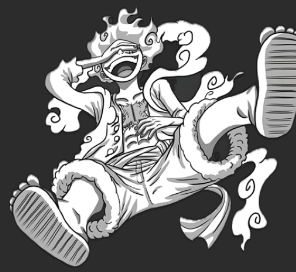